# TASK 2 GRIP
#Prediction Using K-means Algorithm By PREM PATIL

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from sklearn import datasets

In [ ]:
#reading iris data from the given link
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

There is no NaN values

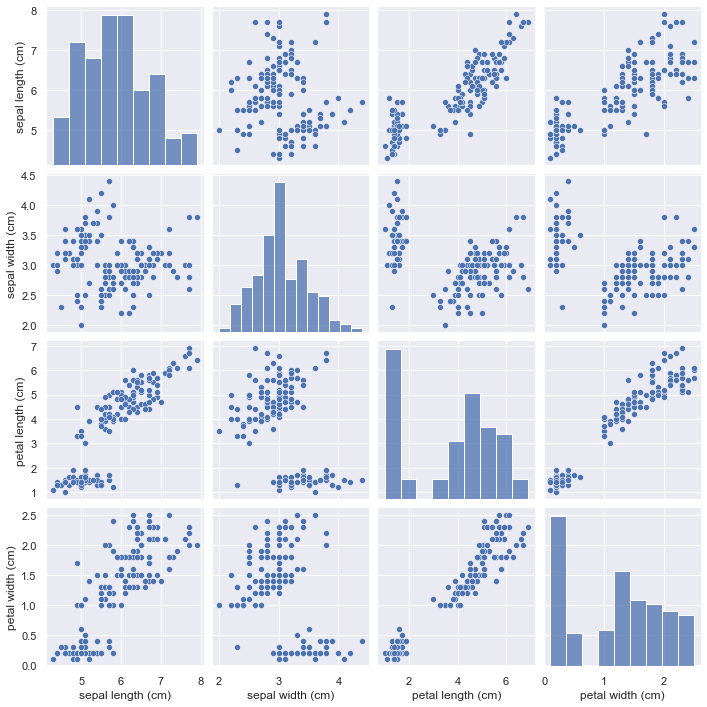

In [ ]:
sns.pairplot(df)

Shows various graphs againts different Parameters of iris dataset.

In [ ]:
df['flower']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.drop(['petal length (cm)','petal width (cm)','flower'],axis='columns',inplace=True)
df.head(3)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


# Model building

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#sum of squared error
sse=[]

for i in range(1,12):
    km=KMeans(n_clusters = i, init='k-means++',  max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)

print(sse)


[681.3705999999996, 152.34795176035797, 78.851441426146, 57.25600931571815, 46.44618205128204, 39.03998724608725, 34.299712121212146, 30.014398496240617, 28.03690635345049, 26.534529220779234, 24.017409798327492]


Text(0, 0.5, 'Within cluster sum of squares')

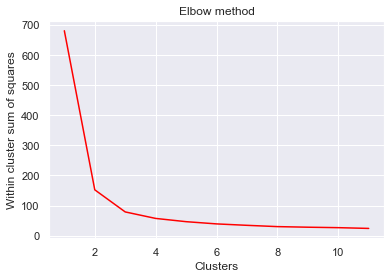

In [ ]:
#elbow plot
plt.plot(range(1,12),sse,color='red')
plt.title("Elbow method")
plt.xlabel("Clusters")
plt.ylabel("Within cluster sum of squares")

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y=kmeans.fit_predict(x)


In [ ]:
df['cluster']=y
df.head()

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

In [ ]:
km.cluster_centers_[0:3,:]

array([[4.67894737, 3.08421053, 1.37894737, 0.2       ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [7.64285714, 3.22857143, 6.5       , 2.2       ]])

No handles with labels found to put in legend.


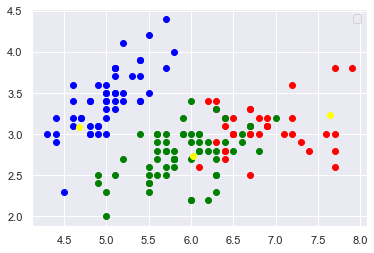

In [ ]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green')
plt.scatter(km.cluster_centers_[0:3,0],km.cluster_centers_[0:3,1],c='yellow')
plt.legend()